### Analyze run

In [1]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import matplotlib.pyplot as plt

In [2]:
BASE_DIR = "/home/datascience/yolov8/runs/detect"
RUN_NAME = "train4"
RUN_LOG = "results.csv"

FILE_NAME = path.join(BASE_DIR, RUN_NAME, RUN_LOG)

In [3]:
results_df = pd.read_csv(FILE_NAME)

results_df.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
155,156,0.81797,0.48017,1.2774,0.99896,1.0,0.995,0.83144,0.77379,0.3918,1.161,0.000094,0.000094,0.000094
156,157,0.77591,0.46778,1.2416,0.99893,1.0,0.995,0.83665,0.76495,0.39182,1.1557,0.000082,0.000082,0.000082
157,158,0.76041,0.46337,1.1741,0.99883,1.0,0.995,0.83585,0.76602,0.39164,1.1545,0.000069,0.000069,0.000069
158,159,0.82340,0.47708,1.2820,0.99877,1.0,0.995,0.83577,0.76047,0.38888,1.149,0.000057,0.000057,0.000057
159,160,0.75709,0.44430,1.2396,0.99888,1.0,0.995,0.84252,0.7606,0.38741,1.1468,0.000045,0.000045,0.000045


In [4]:
def plot_metric(which, df):
    if which == "Precision":
        col = 4
    if which == "Recall":
        col = 5
    if which == "mAP50-95":
        col = 7
    
    vet_epochs = df[df.columns[0]].values
    vet_values = df[df.columns[col]].values
    
    plt.plot(vet_epochs, vet_values)
    plt.grid(True)
    plt.title(which)
    plt.xlabel("Epochs")
    plt.ylabel(which)

### Precision and Recall

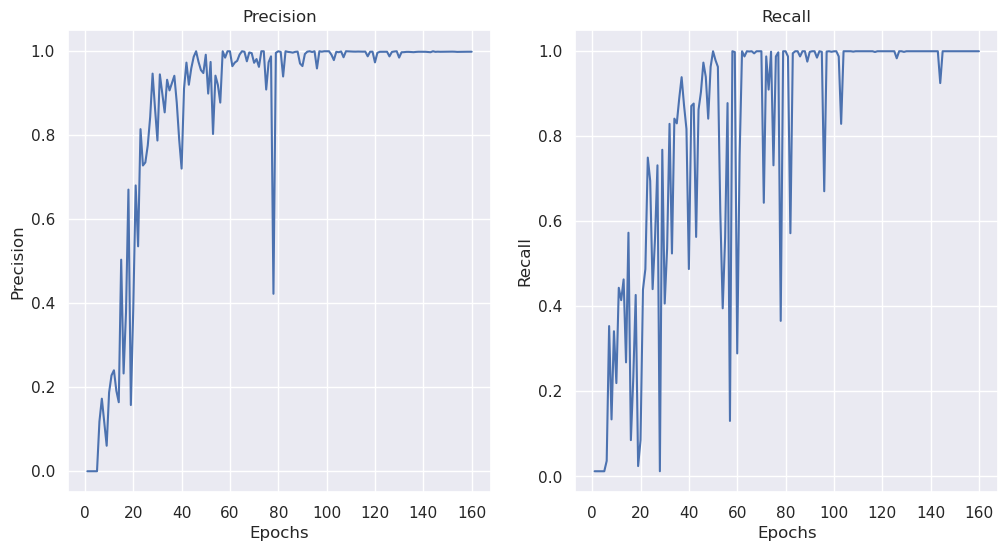

In [5]:
# one grid for two plots
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

plot_metric("Precision", results_df)
plt.subplot(1, 2, 2)
plot_metric("Recall", results_df)

### mAP50-95

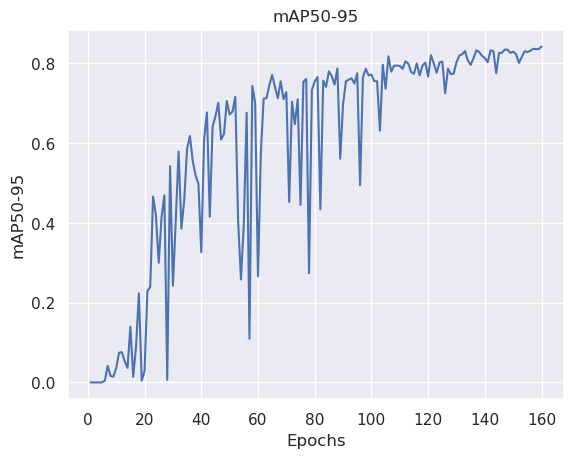

In [6]:
plot_metric("mAP50-95", results_df)